# Exercise: Handwritten digit classification

This exercise is independent of the example given by the teacher `unit3_example_mlp_mnist.ipynb` and is developed following the [Keras introduction for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/).

Basic imports:

In [1]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = 'tensorflow'

import keras

print(keras.__version__)
print(np.__version__)

2024-10-02 02:07:09.766608: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 02:07:09.769896: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-02 02:07:09.779792: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 02:07:09.796995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 02:07:09.801862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 02:07:09.813202: I tensorflow/core/platform/cpu_feature_gu

3.5.0
1.26.4


Loading data:

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Exploring the data:

In [3]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(type(x_train), type(y_train), type(x_test), type(y_test))
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())
print(y_train.max(), y_train.min(), y_test.max(), y_test.min())

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
uint8 uint8 uint8 uint8
255 0 255 0
9 0 9 0


Scaling the images to 0-1 interval:

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Adding a new dimension that represent the channel. Since we are operating in grayscale there is only one channel. If the image were colorful, we would probably have three channels (RGB).

In [5]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


Example of a point more or less in the middle of the image. Notice that it is a tensor of shape 1, since there is only the grayscale channel.

In [7]:
x_train[0, 14, 14]

array([0.9411765], dtype=float32)

In [42]:
from PIL import Image
from IPython.display import display

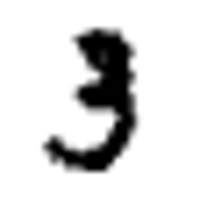

3

In [52]:
sample_index = 10
sample = x_train[sample_index]

sample = (255 * sample.squeeze(axis = -1)).astype(np.uint8)
sample_image = Image.fromarray(sample, mode='L')
sample_image = sample_image.resize((200, 200)) # Increase image size
sample_image = Image.eval(sample_image, lambda x: 255 - x) # Inverts the grayscale


display(sample_image)
y_train[sample_index]

In [54]:
import pandas as pd

df_sample = pd.DataFrame(sample)
df_sample.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0
